<a href="https://colab.research.google.com/github/StephenSpicer/Unit_02_Clone/blob/master/Stephen_Lupsha_DS_module_project_221.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 1*

---

In [1]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'

     |████████████████████████████████| 81kB 2.7MB/s 
     |████████████████████████████████| 245kB 5.3MB/s 
     |████████████████████████████████| 3.1MB 9.3MB/s 
     |████████████████████████████████| 61kB 3.3MB/s 
     |████████████████████████████████| 604kB 38.3MB/s 
     |████████████████████████████████| 81kB 8.3MB/s 
     |████████████████████████████████| 81kB 8.5MB/s 
     |████████████████████████████████| 296kB 50.6MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=1e297db64aa7241c2e1384132eaf952aa9e8bf594cec274ea5ffd5627269fc75
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.0-cp36-none-any.whl size=599738 sha256=73d41ccf41a4567e68a0dadfab38326ad6a384cb608318cc1f9dcf601dfce26a
  Stored in directory: /root/.cache/pip/wheels/af/54/11/aba77f21075918de02f7964eabfe8c10d5542df9e6ad10b225
Successfully built htmlmin phik
ERROR: google

# Decision Trees

## Kaggle

**Task 1:** [Sign up for a Kaggle account](https://www.kaggle.com/), if you don’t already have one. Go to our Kaggle InClass competition website (the URL is in Slack). Go to the Rules page. Accept the rules of the competition. Notice that the Rules page also has instructions for the Submission process. The Data page has feature definitions.

## Wrangle Data

**Task 2:** Add to the code below so that `id` is set as the index for `df`.

In [25]:
# Wrangle function
def wrangle(df):
  #Make copy keep original in memory
  df = df.copy()
  #DropRecordedBy(ConstantValue)
  df.drop(columns=['recorded_by'], inplace=True)
  #HCCV
  drop_cols = [col for col in df.select_dtypes('object').columns
               if df[col].nunique() >100]
  df.drop(columns=drop_cols, inplace=True)
  # Drop repeat ROWS
  df.drop_duplicates(inplace=True)
  # Datetime error - Remember to ask about the other methods for changing date so it works in models. 
  df['pump_age'] = df['date_recorded'].dt.year - df['construction_year'] # this feature will tell us how old each pump is...
  df['date_recorded'] = df['date_recorded'].dt.year
  # Drop repeat COLUMNS
  df.drop(columns=['quantity_group', 'extraction_type_group'], inplace=True)
  #DropNA / features with lots of NA val (with threshold! '_' for comma, pretty cool...)
  df.dropna(axis=1, thresh=30_000, inplace=True)
  return df

In [26]:
import pandas as pd
# This is TRAINING data. That will come up later. 
df = pd.merge(pd.read_csv(DATA_PATH + 'waterpumps/train_features.csv',
                          parse_dates=['date_recorded'],
                          na_values=[0, -2.000000e-08]),
              # Remember to ask about the Parameters here for na_values - also to look them up.
              pd.read_csv(DATA_PATH + 'waterpumps/train_labels.csv')).set_index('id')

# clean data with wrangle function
df = wrangle(df)
df.head()

date_recorded  gps_height  ...    status_group  pump_age
id                                  ...                          
69572.0           2011      1390.0  ...      functional      12.0
8776.0            2013      1399.0  ...      functional       3.0
34310.0           2013       686.0  ...      functional       4.0
67743.0           2013       263.0  ...  non functional      27.0
19728.0           2011         NaN  ...      functional       NaN

[5 rows x 29 columns]

In [27]:
print(df.drop_duplicates().shape)
print()
print(df.shape)

(58123, 29)

(58652, 29)


In [28]:
df.select_dtypes('object').nunique().sort_values()
# one hot encoding lga on down will be a problem... calling it 100+ 

public_meeting            2
permit                    2
status_group              3
source_class              3
quantity                  5
management_group          5
quality_group             6
waterpoint_type_group     6
waterpoint_type           7
source_type               7
payment                   7
extraction_type_class     7
payment_type              7
water_quality             8
basin                     9
source                   10
management               12
scheme_management        12
extraction_type          18
region                   21
dtype: int64

**Test 2**

In [29]:
'''Task 2 Testing'''

assert isinstance(df, pd.DataFrame), 'Have you created the DataFrame `df`?'
assert df.shape == (59400, 40), '`df` is the wrong shape. Did you set the index to `id`?'
assert 69572 in df.index, 'The index for `df` is has the wrong values. Did you set the index to `id`?'

AssertionError: ignored

# EDA

In [30]:
import matplotlib.pyplot as plt

df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 58652 entries, 69572.0 to 26348.0
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date_recorded          58652 non-null  int64  
 1   gps_height             38962 non-null  float64
 2   longitude              57586 non-null  float64
 3   latitude               57586 non-null  float64
 4   basin                  58652 non-null  object 
 5   region                 58652 non-null  object 
 6   region_code            58652 non-null  int64  
 7   district_code          58629 non-null  float64
 8   population             38019 non-null  float64
 9   public_meeting         55502 non-null  object 
 10  scheme_management      54807 non-null  object 
 11  permit                 55596 non-null  object 
 12  construction_year      38691 non-null  float64
 13  extraction_type        58652 non-null  object 
 14  extraction_type_class  58652 non-null  objec

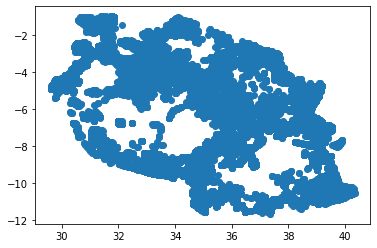

In [31]:
plt.scatter(df['longitude'], df['latitude'])
# Null Island example  
# now it looks like tanzania

In [32]:
df[df['longitude']==0].head()
# so now that's gone... the scatter plot above would be changed also but I will leave it there to remind myself as i move forward. 

Empty DataFrame
Columns: [date_recorded, gps_height, longitude, latitude, basin, region, region_code, district_code, population, public_meeting, scheme_management, permit, construction_year, extraction_type, extraction_type_class, management, management_group, payment, payment_type, water_quality, quality_group, quantity, source, source_type, source_class, waterpoint_type, waterpoint_type_group, status_group, pump_age]
Index: []

In [33]:
from pandas_profiling import ProfileReport

ProfileReport(df, minimal=True)

Summarize dataset:   0%|          | 0/38 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Remember, PandasProfling does not always "Play well with others"

In [34]:
df.head(10).T.duplicated()

date_recorded            False
gps_height               False
longitude                False
latitude                 False
basin                    False
region                   False
region_code              False
district_code            False
population               False
public_meeting           False
scheme_management        False
permit                   False
construction_year        False
extraction_type          False
extraction_type_class    False
management               False
management_group         False
payment                  False
payment_type             False
water_quality            False
quality_group            False
quantity                 False
source                   False
source_type              False
source_class             False
waterpoint_type          False
waterpoint_type_group    False
status_group             False
pump_age                 False
dtype: bool

In [ ]:
# df[['extraction_type', 'extraction_type_group']].head()

# #DOUBLE BRACKETS SON. PAY ATTENTION. 

## Split Data

**Task 3:** Create your target vector `y` and feature matrix `X`.

In [35]:
target = 'status_group'
y = df[target]
X = df.drop(columns=target)

#Alright, this is gonna mess up the assignment, because apparently I wasn't supposed to do that much cleaning. 
# I'm going to keep moving though because following along with the guided proj video has been really helpful... 

print('X:',X.shape)
print('y:',y.shape)

X: (58652, 28)
y: (58652,)


**Test 3**

In [36]:
'''Task 3 Testing'''

assert isinstance(X, pd.DataFrame), '`X` is the wrong data type.'
assert isinstance(y, pd.Series), '`y` is the wrong data type.'
assert y.shape == (59400,), '`y` is the wrong shape.'
assert X.shape == (59400,39), '`X` is the wrong shape.'

AssertionError: ignored

We already have a test set for this model, the `test.csv` that you'll use to make the predictions you'll upload to Kaggle. However, since our competition only allows for 2 submissions per day, we need a way to estimate our training error so that we can quickly iterate and improve our model. We can achieve this by creating a validation set from the data we have.

**Task 4:** Split `X` and `y` into training and validation sets. Your validation set should be 20% of the data you have. You should have four variables: `X_train`, `X_val`, `y_train`, and `y_val`. 

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

**Test 4**

In [50]:
'''Task 4 Testing'''

assert X_train.shape == (47520, 39), '`X_train` is the wrong shape.'
assert X_val.shape == (11880, 39), '`X_val` is the wrong shape.'
assert y_train.shape == (47520,), '`y_train` is the wrong shape.'
assert y_val.shape == (11880,), '`y_val` is the wrong shape.'

AssertionError: ignored

## Establish Baseline

**Task 5:** This is a **classification** problem, so you need to establish the baseline accuracy for your training set. Find the majority class for `y_train` and calculate the percentage of labels in `y_train` belonging to that class. Assign your answer to the variable name `baseline_acc`.

In [51]:
# Establishing Baseline

# This is a categorical / classification problem - 3 categories
baseline_acc = y_train.value_counts(normalize=True).max()
print('Baseline Accuracy:', baseline_acc)

Baseline Accuracy: 0.5428486178896443


In [52]:
print(y_train.head())
print()
print(y_train.value_counts(normalize=True))

id
52717.0    non functional
12154.0    non functional
61464.0        functional
13257.0    non functional
3629.0         functional
Name: status_group, dtype: object

functional                 0.542849
non functional             0.385179
functional needs repair    0.071972
Name: status_group, dtype: float64


**Task 5**

In [53]:
'''Task 5 Testing'''

assert isinstance(baseline_acc, float), '`baseline_acc` should be a `float`.'
assert 0.0 <= baseline_acc <= 1.0, '`baseline_acc` is a score that should be between 0 and 1.'

## Build Model

**Task 6:** Create a model named `model` and train it with your training data. Your model should be a pipeline with (a) transformers that you think are appropriate to this dataset and (b) a `DecisionTreeClassifier` as your predictor. **Tip:** How can you transform categorical features and missing values in order to train your model?

In [22]:
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier



LOGISTIC MODEL FIRST

In [54]:
# First model - Logistic Regression
model_lr = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

model_lr.fit(X_train, y_train);

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Decision Tree Classifier second...

In [57]:
model_dt = make_pipeline(
    OrdinalEncoder(), # Usually better to use ordinal with tree-based models - what are the differences between ordinal and one-hot?
    SimpleImputer(strategy='mean'), # NOTE: No need to scale data - why? i think I know but i want an example. 
    DecisionTreeClassifier()
)

# Root Node (impure) out to Terminal Nodes, or 'Leaves'
model_dt.fit(X_train, y_train);

In [ ]:
# Here is the lesson code for a depth function and tuning the decision tree - PLAY WITH THIS

# depths = range(2,30,2)

# train_acc = []
# val_acc = []

# for depth in depths:
#   tree_model = make_pipeline(
#       OrdinalEncoder(),
#       SimpleImputer(),
#       DecisionTreeClassifier(max_depth=depth, random_state=42)
#   )

#   tree_model.fit(X_train, y_train)

#   train_acc.append(tree_model.score(X_train, y_train))
#   val_acc.append(tree_model.score(X_val, y_val))

**Test 6**

In [58]:
'''Task 6 Testing'''

assert len(model_dt) > 1, 'Your model pipeline should have multiple steps.'
assert isinstance(model_dt[-1], DecisionTreeClassifier), 'Your pipline should end in a `DecisionTreeClassifier`.'
assert hasattr(model_dt, 'classes_'), 'Have you fit your model?'

## Check Metrics

**Task 7:** Calculate the training and validation accuracy of your model, and assign them to the valiables `training_acc` and `validation_acc`, respectively. Your validation accuracy should be greater than your baseline accuracy.

In [59]:
training_acc = model_lr.score(X_train, y_train)
validation_acc = model_lr.score(X_val, y_val)
print('Training Accuracy:', training_acc)
print('Validation Accuracy:', validation_acc)

Training Accuracy: 0.7386884337503463
Validation Accuracy: 0.7334413093512915


In [60]:
print('Decision Tree training accuracy:', model_dt.score(X_train, y_train))
print('Decision Tree validation accuracy:', model_dt.score(X_val, y_val))

Decision Tree training accuracy: 0.9969096992817715
Decision Tree validation accuracy: 0.7516835734378996


**Test 7**

In [45]:
'''Task 7 Testing'''

assert isinstance(training_acc, float)
assert isinstance(validation_acc, float)
assert 0.0 <= training_acc <= 1.0
assert 0.0 <= validation_acc <= 1.0

## Create Kaggle Submission

**Task 8:** Load `'waterpumps/test.csv'` into a DataFrame named `X_test`. Generate a list of predictions, and then put them into a DataFrame `submission`. Be sure that `submission` has the same index as `X_test` and that the column name for your predictions is `'status_group'`.  

In [93]:
# Wrangle function
def wrangle(df):
  #Make copy keep original in memory
  df = df.copy()
  #DropRecordedBy(ConstantValue)
  df.drop(columns=['recorded_by'], inplace=True)
  #HCCV
  drop_cols = [col for col in df.select_dtypes('object').columns
               if df[col].nunique() >100]
  df.drop(columns=drop_cols, inplace=True)
  # Drop repeat ROWS
  #df.drop_duplicates(inplace=True)
  # Datetime error - Remember to ask about the other methods for changing date so it works in models. 
  print('Breakpoint 1:')
 
  df['pump_age'] = df['date_recorded'].dt.year - df['construction_year'] # this feature will tell us how old each pump is...
  print('Breakpoint 2:')
  df['date_recorded'] = df['date_recorded'].dt.year
  # Drop repeat COLUMNS
  df.drop(columns=['quantity_group', 'extraction_type_group'], inplace=True)
  #DropNA / features with lots of NA val (with threshold! '_' for comma, pretty cool...)
  df.dropna(axis=1, thresh=7_000, inplace=True)
  return df

In [94]:
X_test = pd.read_csv(DATA_PATH + 'waterpumps/test_features.csv', index_col='id',
                     parse_dates=['date_recorded'],
                     na_values=[0, -2.000000e-08])

# so i need to wrangle my X

X_test = wrangle(X_test)



# submission.head()

Breakpoint 1:
Breakpoint 2:


In [95]:
print(X_test.shape)
X_test.info()

(14358, 28)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14358 entries, 50785 to 68707
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date_recorded          14358 non-null  int64  
 1   gps_height             9380 non-null   float64
 2   longitude              13922 non-null  float64
 3   latitude               13922 non-null  float64
 4   basin                  14358 non-null  object 
 5   region                 14358 non-null  object 
 6   region_code            14358 non-null  int64  
 7   district_code          14354 non-null  float64
 8   population             9153 non-null   float64
 9   public_meeting         13573 non-null  object 
 10  scheme_management      13419 non-null  object 
 11  permit                 13695 non-null  object 
 12  construction_year      9334 non-null   float64
 13  extraction_type        14358 non-null  object 
 14  extraction_type_class  14358 non-null 

**Test 8**

In [ ]:
'''Task 8 Testing'''

assert isinstance(submission, pd.DataFrame), '`submission` should be a DataFrame.'
assert len(submission) == 14358, '`submission` should have 14358 rows.'

**Task 9 (`stretch goal`):** Save `submission` as a csv file using [`.to_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) and submit it to our Kaggle competition.

In [96]:
# Predicting (decision tree)


submission = model_dt.predict(X_test)

In [97]:
type(submission)
submission.shape

(14358,)

In [99]:
pd.DataFrame({'status_group':submission}, index=X_test.index).to_csv('Submission.csv')


## Explain

**Task 10 (`stretch goal`):** Make a horizontal barchart of the 10 most important features for your model.

Text(0, 0.5, 'Features')

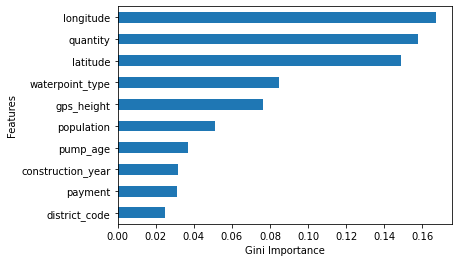

In [48]:
import matplotlib.pyplot as plt

importances = model_dt.named_steps['decisiontreeclassifier'].feature_importances_
features = X_train.columns

pd.Series(importances, index=features).sort_values().tail(10).plot(kind='barh')
plt.xlabel('Gini Importance')
plt.ylabel('Features')